# Trabajo de Mentoria - DiploDatos

**Grupo A**
    
Integrantes: 
    <li> Bruno Garcia
    <li> Nicolas Chiapello
    <li> Martin Peñas
    <li> Pame Pairo

## Vectorización: CountVectorizer

CountVectorizer describe la ocurrencia de palabras dentro de los datos de texto. Da un resultado de 1 si está presente en la oración y 0 si no está presente. Por lo tanto, crea una bolsa de palabras con un recuento de matrices de documentos en cada documento de texto. 

In [1]:
import pandas as pd 

df_news= pd.read_csv("data/feeling_procesado.csv")
df_news.head(3)

,Unnamed: 0,feeling,news,news_tokens,news_tokens_tagged
0,0,neutral,"According to Gran , the company has no plans t...","['accord', 'gran', 'company', 'plan', 'move', ...","[('accord', 'NN'), ('gran', 'VBD'), ('company'..."
1,1,neutral,Technopolis plans to develop in stages an area...,"['technopolis', 'plan', 'develop', 'stage', 'a...","[('technopolis', 'NN'), ('plan', 'NN'), ('deve..."
2,2,negative,The international electronic industry company ...,"['international', 'electronic', 'industry', 'c...","[('international', 'JJ'), ('electronic', 'JJ')..."


## *Aprendizaje Automático*

#### Train/Test Split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(df_news.news_tokens, df_news.feeling, test_size=0.2, random_state=42)

In [3]:
#Realizamos el CV con los textos preprocesados para train y test por separado.
cv = CountVectorizer(lowercase=False)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [4]:
print(y_train[y_train == 'positive'].size/y_train.size)
print(y_train[y_train == 'neutral'].size/y_train.size)
print(y_train[y_train == 'negative'].size/y_train.size)
y_train.size

0.2813953488372093
0.5935400516795866
0.12506459948320414


3870

In [5]:
print(y_test[y_test == 'positive'].size/y_test.size)
print(y_test[y_test == 'neutral'].size/y_test.size)
print(y_test[y_test == 'negative'].size/y_test.size)
y_test.size

0.28202479338842973
0.59400826446281
0.12396694214876033


968

In [6]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [7]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_boundary(model, X, y):
    X = X.T
    y = y.T

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean)
    plt.scatter(X[0, y==1], X[1, y==1], color="dodgerblue", edgecolors='k', label="1")
    plt.scatter(X[0, y==-1], X[1, y==-1], color="tomato", edgecolors='k', label="-1")
    plt.legend()


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

### **Logistic Regresion**

In [8]:
from sklearn.linear_model import LogisticRegression

# Selección de parámetros
params = {
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

Logreg = LogisticRegression()
Logreg_clf = GridSearchCV(Logreg, params, cv=3, scoring='f1_macro', n_jobs=-1)
Logreg_clf.fit(X_train, y_train)

C:\Users\Pame\anaconda3\envs\diplo\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.68884462        nan 0.68002565 0.66634985
 0.66634985 0.66645151 0.67366366 0.67394146        nan        nan
        nan        nan        nan 0.60582623 0.64815908        nan
 0.6560792  0.66593248]
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_macro')

In [9]:
# Logreg_clf = RandomizedSearchCV(Logreg, params, n_iter=36, cv=2, random_state=0, n_jobs=-1)
# Logreg_clf.fit(X_train, y_train)

# best_Logreg = Logreg_clf.best_estimator_

In [9]:
best_Logreg = Logreg_clf.best_estimator_
print(best_Logreg)

LogisticRegression(penalty='l1', solver='liblinear')


In [10]:
text = "Regresión Logística - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_Logreg.predict(X_test)))

Regresión Logística - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.69      0.59      0.64       120
     neutral       0.80      0.87      0.83       575
    positive       0.69      0.61      0.65       273

    accuracy                           0.76       968
   macro avg       0.73      0.69      0.71       968
weighted avg       0.75      0.76      0.76       968



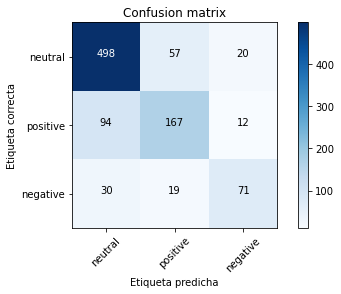

In [11]:
cm = confusion_matrix(y_test, best_Logreg.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### **SVM**

In [12]:
from sklearn.svm import SVC

params = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["auto", "scale"],
    "C": [1,10,20]
}

svm = SVC()
svm_clf = GridSearchCV(svm, params, cv=3, scoring='f1_macro', n_jobs=-1)
svm_clf.fit(X_train, y_train)

best_svm = svm_clf.best_estimator_

In [13]:
print(best_svm)

SVC(C=1, gamma='auto', kernel='linear')


In [14]:
text = "SVM - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_svm.predict(X_test)))

SVM - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.60      0.64      0.62       120
     neutral       0.81      0.82      0.81       575
    positive       0.65      0.61      0.63       273

    accuracy                           0.74       968
   macro avg       0.68      0.69      0.69       968
weighted avg       0.74      0.74      0.74       968



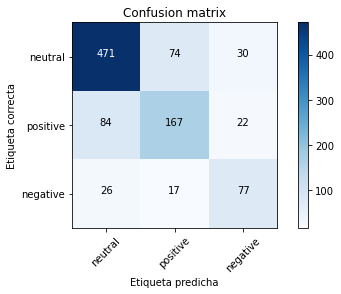

In [15]:
cm = confusion_matrix(y_test, best_svm.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### **SGDClassifier**

In [16]:
from sklearn.linear_model import SGDClassifier

params = {
    'loss': ['perceptron','hinge','log','squared_loss','epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'none'],
    'alpha' : [0.0001, 0.001, 0.01, 0.1],
    'random_state': [42],
    'learning_rate': ['optimal','constant','invscaling'],
    'eta0': [0.0001, 0.001, 0.01, 0.1]
}

sgdlinear = SGDClassifier()
sgdlinear_clf = GridSearchCV(sgdlinear, params, cv=5, scoring='f1_macro', n_jobs=-1)
sgdlinear_clf.fit(X_train, y_train)

best_sgdlinear = sgdlinear_clf.best_estimator_

In [ ]:
# sgdlinear_clf = RandomizedSearchCV(sgdlinear, params, n_iter=36, cv=10, random_state=0, n_jobs=-1)
# sgdlinear_clf.fit(X_train, y_train)

# best_sgdlinear = sgdlinear_clf.best_estimator_

In [17]:
print(best_sgdlinear)

SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='constant', random_state=42)


In [44]:
text = "SGD Classifier - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_sgdlinear.predict(X_test)))

SGD Classifier - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.62      0.60      0.61       120
     neutral       0.80      0.84      0.82       575
    positive       0.68      0.63      0.65       273

    accuracy                           0.75       968
   macro avg       0.70      0.69      0.69       968
weighted avg       0.74      0.75      0.75       968



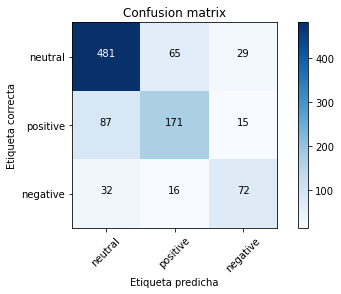

In [19]:
cm = confusion_matrix(y_test, best_sgdlinear.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### **Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Selección de parámetros
params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1, 2, 5],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [200, 300, 400],
    # 'max_depth': [3, 6, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

rforest = RandomForestClassifier()
rforest_clf = GridSearchCV(rforest, params, cv=3, scoring='f1_macro', n_jobs=-1)
rforest_clf.fit(X_train, y_train)

best_rforest = rforest_clf.best_estimator_

C:\Users\Pame\anaconda3\envs\diplo\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.64080592 0.6458832         nan 0.5934171  0.59929976
        nan 0.48882421 0.49223           nan 0.6443562  0.65322215
        nan 0.59121887 0.60153477        nan 0.47370087 0.48032461
        nan 0.52780261 0.53067294        nan 0.24896167 0.24831088
        nan 0.24831088 0.24831088        nan 0.64179078 0.64707255
        nan 0.59781541 0.59863775        nan 0.47173894 0.47673671
        nan 0.64696429 0.65560552        nan 0.5967176  0.592245
        nan 0.47691056 0.49037871        nan 0.55332542 0.54387842
        nan 0.24896167 0.24831088        nan 0.24831088 0.24831088
        nan 0.63697884 0.6458445         nan 0.59453398 0.59360113
        nan 0.48307442 0.49303464        nan 0.64859377 0.64950055
        nan 0.60438365 0.60920198        nan 0.48726052 0.49096723
        nan 0.5618857  0.5605566         nan 

In [ ]:
# rforest_clf = RandomizedSearchCV(rforest, params, n_iter=36, cv=10, random_state=0)
# rforest_clf.fit(X_train, y_train)

# best_rforest = rforest_clf.best_estimator_

In [21]:
print(best_rforest)

RandomForestClassifier(max_depth=300, max_features='sqrt', min_samples_split=5)


In [22]:
text = "Random Forest - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_rforest.predict(X_test)))

Random Forest - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.80      0.49      0.61       120
     neutral       0.77      0.92      0.84       575
    positive       0.71      0.55      0.62       273

    accuracy                           0.76       968
   macro avg       0.76      0.65      0.69       968
weighted avg       0.76      0.76      0.75       968



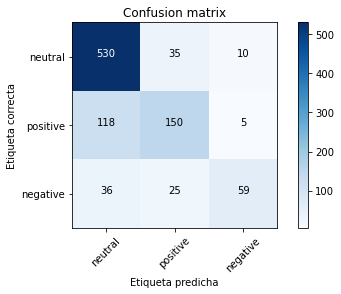

In [23]:
cm = confusion_matrix(y_test, best_rforest.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### **MultinomialNB**

In [24]:
from sklearn.naive_bayes import MultinomialNB

multinomNB = MultinomialNB().fit(X_train, y_train)
multinomNB

MultinomialNB()

In [25]:
multinomNB.classes_

array(['negative', 'neutral', 'positive'], dtype='<U8')

In [26]:
multinomNB.class_count_

array([ 484., 2297., 1089.])

In [27]:
np.exp(multinomNB.class_log_prior_)

array([0.1250646 , 0.59354005, 0.28139535])

In [28]:
text = "Naive Bayes - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, multinomNB.predict(X_test)))

Naive Bayes - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.63      0.57      0.60       120
     neutral       0.77      0.83      0.80       575
    positive       0.60      0.52      0.56       273

    accuracy                           0.71       968
   macro avg       0.67      0.64      0.65       968
weighted avg       0.70      0.71      0.71       968



#### GridSearchCV

In [29]:
param_grid = {
    'alpha': [1.0, 0.5, 0.1, 0.01, 0.001, 0.0001],
    'fit_prior': [1, 0],
    'class_prior': [None, [0.33, 0.34, 0.33], [0.12790698, 0.58914729, 0.28294574]]
}

multinomNB = MultinomialNB()
multinomNB_clf = GridSearchCV(multinomNB, param_grid, scoring='f1_macro', cv=10)
multinomNB_clf.fit(X_train, y_train);

In [30]:
best_multinomNB = multinomNB_clf.best_estimator_
best_multinomNB

MultinomialNB(alpha=0.5, fit_prior=1)

In [31]:
print(classification_report(y_test, best_multinomNB.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.53      0.60      0.56       120
     neutral       0.78      0.81      0.79       575
    positive       0.59      0.50      0.54       273

    accuracy                           0.70       968
   macro avg       0.63      0.64      0.63       968
weighted avg       0.69      0.70      0.69       968



#### RandomizedSearchCV

In [32]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'alpha': [1.0, 0.5, 0.1, 0.01, 0.001, 0.0001],
    'fit_prior': [1, 0],
    'class_prior': [None, [0.33, 0.34, 0.33], [0.12790698, 0.58914729, 0.28294574]]
}

multinomNB = MultinomialNB()
multinomNB_clf = RandomizedSearchCV(multinomNB, param_grid, n_iter=36, cv=10, random_state=0)
multinomNB_clf.fit(X_train, y_train);

In [33]:
best_multinomNB = multinomNB_clf.best_estimator_
best_multinomNB

MultinomialNB(fit_prior=1)

In [34]:
print(classification_report(y_test, best_multinomNB.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.63      0.57      0.60       120
     neutral       0.77      0.83      0.80       575
    positive       0.60      0.52      0.56       273

    accuracy                           0.71       968
   macro avg       0.67      0.64      0.65       968
weighted avg       0.70      0.71      0.71       968



### **DecisionTreeClassifier**

In [35]:
from sklearn.tree import DecisionTreeClassifier

search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [3, 6, 10]
}
tree = DecisionTreeClassifier(random_state=42)
tree_clf = GridSearchCV(tree, search_params, cv=3, scoring='f1_macro', n_jobs=-1)
tree_clf.fit(X_train, y_train)

best_tree = tree_clf.best_estimator_

In [36]:
print(best_tree)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)


In [38]:
text = "Arboles de decisión - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_tree.predict(X_test)))

Arboles de decisión - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.69      0.28      0.40       120
     neutral       0.70      0.94      0.80       575
    positive       0.70      0.39      0.50       273

    accuracy                           0.70       968
   macro avg       0.70      0.54      0.57       968
weighted avg       0.70      0.70      0.67       968



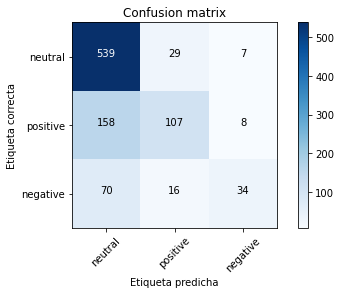

In [39]:
cm = confusion_matrix(y_test, best_tree.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])

### **KNeighborsClassifier**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    "n_neighbors": [1,2,3,4,5,6,7,8,15,20],
    "weights": ["uniform", "distance"],
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"]
}

knn = KNeighborsClassifier()
knn_clf= GridSearchCV(knn, params, cv=3, scoring='f1_macro', n_jobs=-1)
knn_clf.fit(X_train, y_train)

best_knn = knn_clf.best_estimator_

In [41]:
print(best_knn)

KNeighborsClassifier(n_neighbors=1)


In [42]:
text = "KNN - Reporte de clasificación del conjunto de testeo"
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_test, best_knn.predict(X_test)))

KNN - Reporte de clasificación del conjunto de testeo
              precision    recall  f1-score   support

    negative       0.33      0.33      0.33       120
     neutral       0.71      0.88      0.79       575
    positive       0.61      0.31      0.41       273

    accuracy                           0.65       968
   macro avg       0.55      0.51      0.51       968
weighted avg       0.64      0.65      0.62       968



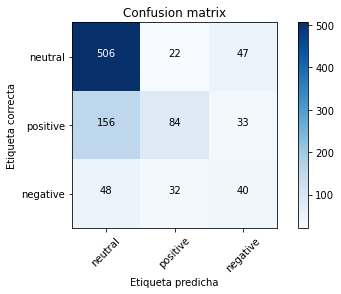

In [43]:
cm = confusion_matrix(y_test, best_knn.predict(X_test),
                      labels=['neutral', 'positive', 'negative'])
plot_confusion_matrix(cm, ['neutral', 'positive', 'negative'])